Name-Vishal Manoharrao Gawali

Reg No-20MAI0049

2. Write a python code to filter the given image using following size of the  filters (receptive field) 
hyper parameters (box filter) 
    1. filter size (3*3) and (5*5) 
    2. filter size (3*3) and (5*5), stride=2 
    3. filter size (3*3) and (5*5), stride=1, zero-padding 
    4. Metrics : entropy 

In [75]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image

In [76]:
#reading the image from the local drive
img=cv2.imread("image2.jpg")#update the path of image
#resizing the image square dimension
img=cv2.resize(img,(300,300))
#defining the filter of 3 X 3 size and applying it first
filter1=np.array([(1,1,1),(1,1,1),(1,1,1)])*(1/9)
#defining the filter of 5 X 5 size and comapre it
filter2=np.array([(1,1,1,1,1),(1,1,1,1,1),(1,1,1,1,1),(1,1,1,1,1),(1,1,1,1,1)])*(1/25)
print(filter1)
print(filter2)

[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]
[[0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]]


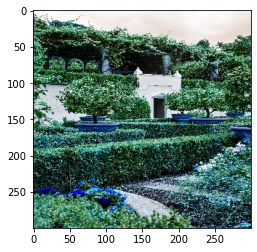

In [77]:
C=img.shape
F=filter1.shape
#converting the colouerd cat image into grayscale image or (Binary conversion)
img_gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(img)

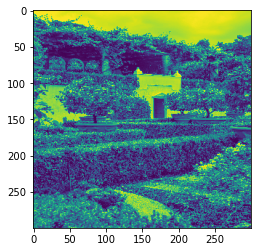

In [78]:
#print gray image
plt.imshow(img_gray)

In [79]:
print(img_gray)
print(type(img_gray))
img_gray2=img_gray
print(img_gray2)
print(type(img_gray2))

[[254 254 254 ... 232 232 231]
 [254 254 254 ... 231 231 231]
 [254 254 254 ... 231 231 231]
 ...
 [198 164 103 ...  37  26  14]
 [178 165  94 ...  34  64  67]
 [169 133  98 ...  12  17  78]]
<class 'numpy.ndarray'>
[[254 254 254 ... 232 232 231]
 [254 254 254 ... 231 231 231]
 [254 254 254 ... 231 231 231]
 ...
 [198 164 103 ...  37  26  14]
 [178 165  94 ...  34  64  67]
 [169 133  98 ...  12  17  78]]
<class 'numpy.ndarray'>


# Applying Box filter of 3 X 3 and calculate Entropy.

[[255 255 255 ... 232 155  77]
 [255 255 255 ... 231 154  77]
 [251 255 255 ... 232 155  78]
 ...
 [145 121 121 ...  39  30  18]
 [ 93  76  76 ...  31  26  17]
 [ 45  32  30 ...  12  11   9]]


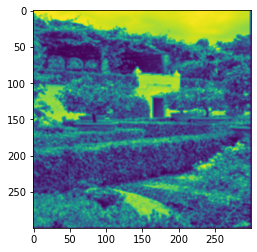

In [80]:
# Applying Box filter of 3 X 3 and calculate Entropy.
import math
def pro_sum(m,n):
    sum=0
    for i in range(m.shape[0]):
        for j in range(m.shape[1]):
            sum=sum+(m[i,j]*n[i,j])
    return math.ceil(sum)
for i in range(C[0]):
    for j in range(C[1]):
        k = img_gray[i:i+F[0],j:j+F[1]]#slicing the image in the form of multiple filter dimension 
        l = pro_sum(k,filter1)
        img_gray2[i][j]=l
print(img_gray2)        
plt.imshow(img_gray2) #filtered image 

In [84]:
#Entropy of the filtered image
import skimage.measure    
entropy = skimage.measure.shannon_entropy(img_gray2)
print("Entropy of filter image of filter size 3X3 is",entropy)

Entropy of filter image of filter size 3X3 is 6.280643924285856


# Applying Box filter of  5 X 5 

[[33 33 34 ... 12  5  2]
 [31 32 33 ... 12  5  2]
 [29 30 32 ... 12  5  2]
 ...
 [ 6  6  6 ...  2  1  1]
 [ 3  3  3 ...  1  1  1]
 [ 1  1  1 ...  1  1  1]]


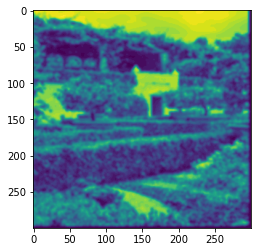

In [86]:
#Applying Box filter of  5 X 5 
img_gray3=img_gray
import math
def pro_sum(m,n):
    sum=0
    for i in range(m.shape[0]):
        for j in range(m.shape[1]):
            sum=sum+(m[i,j]*n[i,j])
    return math.ceil(sum)
for i in range(C[0]):
    for j in range(C[1]):
        k = img_gray[i:i+F[0],j:j+F[1]]#slicing the image in the form of multiple filter dimension 
        l = pro_sum(k,filter2)
        img_gray3[i][j]=l
print(img_gray3)        
plt.imshow(img_gray3) #print filtered image

In [87]:
entropya = skimage.measure.shannon_entropy(img_gray3)
print("Entropy of filter image of filter size 5X5 is",entropya)

Entropy of filter image of filter size 5X5 is 4.800372712623203


# Applying Box filter of 3 X 3 with Stride=2 and calculate Entropy.

[[88 90 90 ...  5  2  1]
 [84 87 88 ...  5  2  1]
 [80 83 84 ...  5  2  1]
 ...
 [ 3  3  3 ...  2  1  1]
 [ 1  1  1 ...  1  1  1]
 [ 1  1  1 ...  1  1  1]]
Entropy for 3X3 filter withe stride =2 is 6.222785384505306


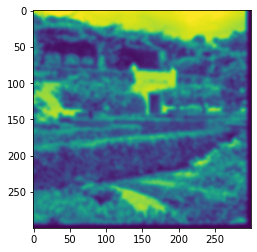

In [59]:
img_gray4=img_gray
import math
def pro_sum(m,n):
    sum=0
    for i in range(m.shape[0]):
        for j in range(m.shape[1]):
            sum=sum+(m[i,j]*n[i,j])
    return math.ceil(sum)

for i in range(C[0]):
    for j in range(C[1]):
        k = img_gray[i:i+F[0],j:j+F[1]]#slicing the image in the form of multiple filter dimension 
        l = pro_sum(k,filter1)
        img_gray4[i][j]=l
        j+=1 #here the stride is 2 or filter jumps by 2 pixals intead of 1
    i+=1
print(img_gray4)        
plt.imshow(img_gray4)#print filtered image

In [60]:
entropy1 = skimage.measure.shannon_entropy(img_gray4)
print("Entropy for 3X3 filter withe stride =2 is",entropy1)

Entropy for 3X3 filter withe stride =2 is 6.222785384505306


# Applying Box filter of 5 X 5  with Stride=2 and calculate Entropy.

[[11 11 11 ...  1  1  1]
 [10 11 11 ...  1  1  1]
 [10 10 10 ...  1  1  1]
 ...
 [ 1  1  1 ...  1  1  1]
 [ 1  1  1 ...  1  1  1]
 [ 1  1  1 ...  1  1  1]]


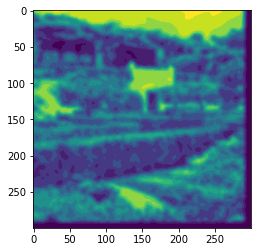

In [63]:
img_gray5=img_gray
import math
def pro_sum(m,n):
    sum=0
    for i in range(m.shape[0]):
        for j in range(m.shape[1]):
            sum=sum+(m[i,j]*n[i,j])
    return math.ceil(sum)

for i in range(C[0]):
    for j in range(C[1]):
        k = img_gray5[i:i+F[0],j:j+F[1]]#slicing the image in the form of multiple filter dimension 
        l = pro_sum(k,filter2)
        img_gray5[i][j]=l
        j+=1 #here the stride is 2 or filter jumps by 2 pixals intead of 1
    i+=1
print(img_gray5)        
plt.imshow(img_gray5)

In [65]:
entropy2 = skimage.measure.shannon_entropy(img_gray5)
print("Entropy for 5X5 filter withe stride =2 is",entropy2)

Entropy for 5X5 filter withe stride =2 is 3.313874911913637


# Apply zero padding before applying Box filter 

In [66]:
A=C[0]+F[0]-1
B=C[1]+F[1]-1
Y= np.zeros((A,B))#creating the image of all zero intensity pixals
print(Y)
print(Y.shape)
Z=Y

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(302, 302)


In [68]:
#fitting the input image in the centre of zero intensity pixals image Y to form zero padeded image Z
for i in range(C[0]):
    for j in range(C[1]):
        m=np.int((F[0]-1)/2)
        n=np.int((F[1]-1)/2)
        Z[i+m,j+n]=img_gray[i,j]
print("The pixal values after zero padding is ")
print(Z)
print(Z.shape)
print(Z[0,0],Z[1,1])

The pixal values after zero padding is 
[[ 0.  0.  0. ...  0.  0.  0.]
 [ 0. 11. 11. ...  1.  1.  0.]
 [ 0. 10. 11. ...  1.  1.  0.]
 ...
 [ 0.  1.  1. ...  1.  1.  0.]
 [ 0.  1.  1. ...  1.  1.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]]
(302, 302)
0.0 11.0


# Applying Box filter of 3 X 3 with Zero padding and calculate Entropy.

[[ 5  8  8 ...  1  1  1]
 [ 7 11 11 ...  2  2  1]
 [ 7 10 11 ...  2  2  1]
 ...
 [ 1  2  2 ...  2  2  1]
 [ 1  2  2 ...  2  2  1]
 [ 1  1  1 ...  1  1  1]]


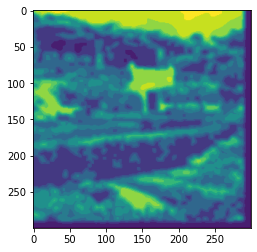

In [69]:
img_gray6=img_gray
import math
def pro_sum(m,n):
    sum=0
    for i in range(m.shape[0]):
        for j in range(m.shape[1]):
            sum=sum+(m[i,j]*n[i,j])
    return math.ceil(sum)

for i in range(C[0]):
    for j in range(C[1]):
        k = Z[i:i+F[0],j:j+F[1]]#slicing the image in the form of multiple filter dimension 
        l = pro_sum(k,filter1)
        img_gray6[i][j]=l

print(img_gray6)        
plt.imshow(img_gray6)

In [70]:
entropy3 = skimage.measure.shannon_entropy(img_gray6)
print("Entropy for 3X3 filter with zero padding is",entropy3)

Entropy for 3X3 filter with zero padding is 3.2225001811433893


# Applying Box filter of 5 X 5 with Zero padding and calculate Entropy.

[[2 3 3 ... 1 1 1]
 [3 4 4 ... 1 1 1]
 [3 4 4 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]


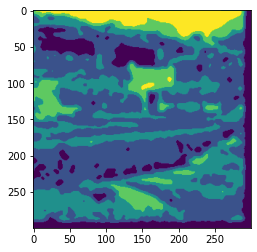

In [72]:
img_gray7=img_gray
import math
def pro_sum(m,n):
    sum=0
    for i in range(m.shape[0]):
        for j in range(m.shape[1]):
            sum=sum+(m[i,j]*n[i,j])
    return math.ceil(sum)

for i in range(C[0]):
    for j in range(C[1]):
        k = Z[i:i+F[0],j:j+F[1]]#slicing the image in the form of multiple filter dimension 
        l = pro_sum(k,filter2)
        img_gray7[i][j]=l

print(img_gray7)        
plt.imshow(img_gray7)

In [73]:
entropy4 = skimage.measure.shannon_entropy(img_gray6)
print("Entropy for 5X5 filter with zero padding is",entropy4)

Entropy for 5X5 filter with zero padding is 1.9260654668559873


# Conclusion

In this Implementation Image is filter using 3x3 and 5x5 size filter we got  blur image after applying stride =2 we got slightly more blur image and at the last when we used filter with  zero padding we got low entropy image that is more blur image.